#csv_modifier.ipynb
数千行に及ぶcsvファイルを（十行ごとに）抽出・再付番する。 

cf. [csv_integrator.ipynb](https://colab.research.google.com/drive/1S6fQ3fPmLLrQWLa_eN50o-Zgd_zcXqsY#scrollTo=vhwpNNyMBtFF)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#import csv
import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#variables
dir = "/content/drive/MyDrive/2. KP/2_作業/コンクリ破壊試験_data/2022_normal_lot1/"
csv = "lot1_day1_2.csv"
load = dir+csv
save=dir+"modified_"+csv

##統合版

In [ ]:
df = pd.read_csv(load,encoding='shift-jis')
df.drop('試験回数', axis=1, inplace=True)
df.drop('移動量[mm]', axis=1, inplace=True)
df_zero = pd.DataFrame(np.zeros(len(df.columns)).reshape(1,len(df.columns)), index=['0'], columns=df.columns)
df_tail = df.tail(1)
df=pd.concat([df_zero, df])[::50]
df=pd.concat([df, df_tail])
df=df.reset_index(drop=True)
df.to_csv(save, encoding="shift_jis")
print(save+" に保存完了")

/content/drive/MyDrive/2. KP/2_作業/コンクリ破壊試験_data/2022_normal_lot1/modified_lot1_day1_2.csv に保存完了


##過程

In [ ]:
#データを読み込み、dfに格納　試験回数と移動量は不要につき削除する
df = pd.read_csv(load,encoding='shift-jis')
df.drop('試験回数', axis=1, inplace=True)
df.drop('移動量[mm]', axis=1, inplace=True)
#df

In [ ]:
#0秒0mm0Nの項目がないので、「df_zero」に用意しておく
zero_initializer = np.zeros(len(df.columns)).reshape(1,len(df.columns))
df_zero = pd.DataFrame(zero_initializer, index=['0'], columns=df.columns)
#df_zero

In [ ]:
#df_zeroをdfに挿入
df=pd.concat([df_zero, df])
#df

In [ ]:
#最後の記録は消えてほしくないので、別に抜き出しておく
df_tail=df.tail(1)
#df_tail

In [ ]:
#dfを50行ごとに抽出
df=df[::50]
#df

In [ ]:
#最終行のデータdf_tailをdfに復帰させる
df=pd.concat([df, df_tail]) 
#df

In [ ]:
#再付番
df=df.reset_index(drop=True)
#df

In [ ]:
#編集済みデータを別のcsvとして保存
df.to_csv(save, encoding="shift_jis")
print(save+" に保存完了")

##test

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26178 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38291 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31227 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21205 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33655 missing from current font.
  font.set_

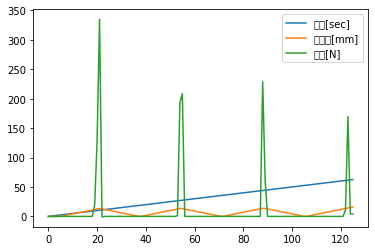

In [ ]:
#簡易グラフ　beta
##　日本語化
##　secとmmのプロットを削除
##　縮尺の調整
#####　これはexcelの方が良いか？
df.plot()